In [3]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
#R = open('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Practica_computacional\mag_papers_166.txt', 'r') 

paper_conjuntos = []

#Saca el campo del diccionario
def sacarcampo(paper,key):
    if key in paper:
        del paper[key]

#Filtra papers, saca campos innecesarios y guarda en archivo "papers_filtro_n.txt"
def agregarpaper(R_n,paper_conjuntos):
    paper_conjuntos = []
    archivo_guardar = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_11.txt','a',encoding='utf-8') 
    R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\mag_papers_'+R_n+'.txt', 'r') 
    N = 999999
    i = 0
    for line in R:
        paper=ast.literal_eval(line)
        try:
            paper['doc_type']
            paper['fos']
            paper['keywords']
            paper['references']
            paper['venue']
            if paper['doc_type']=='Journal' and paper['lang']=='en':
                paper_conjuntos.append(paper)
                key='abstract';sacarcampo(paper,key)
                key='url';sacarcampo(paper,key)
                key='lang';sacarcampo(paper,key)
                key='page_start';sacarcampo(paper,key)
                key='page_end';sacarcampo(paper,key)
                key='doc_type';sacarcampo(paper,key)
                key='pdf';sacarcampo(paper,key)
                archivo_guardar.write(str(paper)+'\n')
        except KeyError:
            pass
        i+=1
        if i==N:
            break
    R.close()
    archivo_guardar.close()
    return(paper_conjuntos)

#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in)

#Crea el archivo de papers filtrados, la lista y el diccionario de frecuencias de citas
def agregar_contar(ides_in,ides_out,R_n,paper_conjuntos):
    paper_conjuntos=agregarpaper(R_n,paper_conjuntos)
    ides_in=contador(ides_in,ides_out,paper_conjuntos)
    return(ides_in,ides_out)
    
ides_out=[]
ides_in={}
for i in range(50):
    ides_in,ides_out=agregar_contar(ides_in,ides_out,str(i),[])
    print(i)

0
1
2
3
4
5
6


In [13]:
interseccion=(set(ides_out).intersection(list(ides_in.keys())))
len(interseccion)

285356

In [41]:
def filtrar_paper(G,interseccion):
    paper_conjuntos = []
    version=str(1)
    R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_11.txt','a',encoding='utf-8') 
    archivo_red = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_red'+version+'.txt','a',encoding='utf-8')
    archivo_year = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_year'+version+'.txt','a',encoding='utf-8')
    archivo_venue = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_venue'+version+'.txt','a',encoding='utf-8')
    archivo_fos = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_fos'+version+'.txt','a',encoding='utf-8')
    archivo_keywords = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_keywords'+version+'.txt','a',encoding='utf-8')
    archivo_name = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_name'+version+'.txt','a',encoding='utf-8')
    archivo_org = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\archivo_org'+version+'.txt','a',encoding='utf-8')
    for line in R:
        paper=ast.literal_eval(line)
        if paper['id'] in interseccion:
            archivo_year.write(paper['id']+' '+str(paper['year'])+'\n')
            archivo_fos.write(paper['id']+' '+str(paper['fos'])+'\n')
            try:
                archivo_keywords.write(paper['id']+' '+str(paper['keywords'])+'\n')
            except KeyError:
                pass
            try:
                archivo_venue.write(paper['id']+' '+str(paper['venue'])+'\n')
            except KeyError:
                pass
            try:
                archivo_name.write(paper['id']+' '+paper['authors'][0]['name']+'\n')
            except KeyError:
                pass
            try:
                archivo_org.write(paper['id']+' '+paper['authors'][0]['org']+'\n')
            except KeyError:
                pass
            
            for cita in paper['references']:
                if cita in interseccion:
                    G.add_edge(paper['id'],cita)  
                    archivo_red.write(paper['id']+' '+cita+'\n')
    R.close()
    archivo_red.close()
    archivo_year.close()
    archivo_venue.close()
    archivo_fos.close()
    archivo_keywords.close()
    archivo_name.close()
    archivo_org.close()
    return(G)

G=nx.DiGraph()
conteo_archivos=[0, 1, 2, 3, 4, 5, 6]
for i in conteo_archivos:
    G=filtrar_paper(str(i),G,interseccion)
    print(i)

0
1
2
3
4
5
6


In [42]:
print(len(G))

# grados_G = [gra for gra in G.out_degree().values()]
# grados_G.count(0)

191368


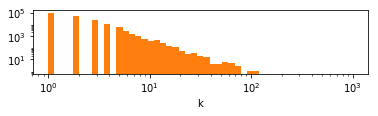

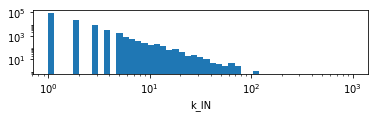

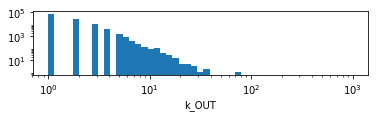

In [44]:
# Distribución de grado
plt.subplot(311)
grados_G = [gra for gra in G.degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.subplot(312)
# Distribución de grado IN
grados_G = [gra for gra in G.in_degree().values()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.subplot(313)
# Distribución de grado OUT
grados_G = [gra for gra in G.out_degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

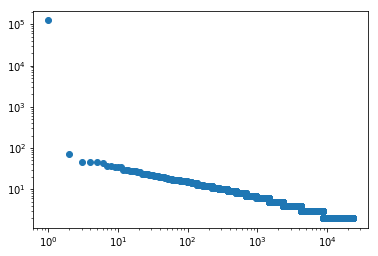

In [56]:
GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))
largo=[]
for i in Componentes:
    largo.append(len(i))

plt.figure()
plt.loglog(range(1,len(largo)+1),largo,'o')
plt.show()

In [46]:
M=1

options = {
'node_size': 1,
'width': 0.01,
}

for i in Componentes[:M]:
    nx.draw(i, **options)
    plt.show()

C:\Users\Usuario\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Usuario\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be re

MemoryError: 

In [59]:
len(Componentes[0])

10163

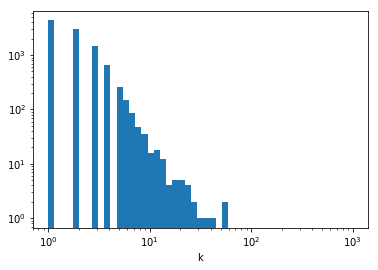

In [60]:
# Distribución de grado
grados_G = [gra for gra in Componentes[0].degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()